The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


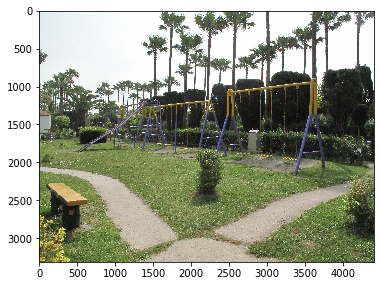

time: 2.29 s


In [83]:
%load_ext autotime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
import seaborn as sns
import cv2 as cv
%matplotlib inline
img = cv.imread("IMG_2805.JPG")
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
# img_lab = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)

In [102]:
zimg = np.zeros((420, 430))
points = img_lab.reshape((-1, 3))
print(points.shape[0])
sample_points = points[np.random.choice(points.shape[0], 5000, replace=False)]
bandwidth = estimate_bandwidth(points, quantile=0.1, n_samples=5000)
print(bandwidth)

14625792
17.096171510894678
time: 4.53 s


In [103]:
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
meanshift.fit(sample_points)
print("done fit")
predicts = meanshift.predict(points)
predict_colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 0, 0], [125, 125, 125], [125, 0, 0], [0, 125, 0],
                  [0, 0, 125], [125, 0, 125], [125, 125, 0], [0, 125, 125], [0, 50, 50], [50, 50, 0], [50, 0, 50],
                  [50, 125, 0], [50, 0, 125], [125, 0, 50], [125, 50, 0], [0, 125, 50], [0, 50, 125], [125, 50, 50],
                  [50, 50, 125], [50, 125, 50], [255, 125, 0], [255, 0, 125], [0, 255, 125], [125, 255, 0], [125, 0, 255],
                  [0, 125, 255], [255, 125, 125], [125, 125, 255], [125, 255, 125], [255, 255, 0], [0, 255, 255], [255, 0, 255],
                  [125, 255, 255], [25, 125, 255], [255, 255, 125], [125, 255, 125], [125, 125, 255], [255, 125, 125]]
predicts = np.array(predicts)
print(np.unique(predicts))
print(predicts.max(), predicts.min())

done fit
[0 1 2 3 4 5 6 7 8 9]
9 0
time: 9.99 s


(3312, 4416, 3)
(3312, 4416, 3)


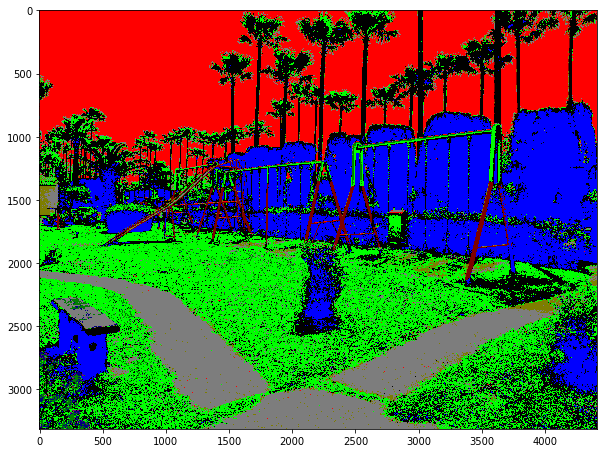

time: 14.7 s


In [122]:
img_res = img.copy()
print(img_res.shape)
func = []
for i in range(3):
    func.append(np.vectorize(lambda x: predict_colors[x][i]))

color_predict = []
for i in range(3):
    color_predict.append(func[i](predicts))
color_predict = np.array([x.reshape((img.shape[0], img.shape[1])) for x in color_predict], dtype=np.uint8)
img_res = np.dstack(color_predict)
print(img_res.shape)
# for i, pred in enumerate(predicts):
#     x = i//img.shape[1]
#     y = np.mod(i, img.shape[1])
#     img_res[x, y] = predict_colors[pred]

# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         img_res[i, j] = predict_colors[predicts[i*img.shape[1] + j]]

plt.figure(figsize=(10,10))
plt.imshow(img_res)
# plt.imshow(cv.fastNlMeansDenoisingColored(img_res,None,10,10,7,21))
plt.imsave("im05.jpg", img_res)
# plt.imsave("img05-nono.jpg", cv.fastNlMeansDenoisingColored(img_res,None,10,10,7,21))

<div dir="rtl">
برای قطعه بندی،‌ابتدا نقاط تصویر را به مبنا LAB برده ایم و سپس یک نمونه از نقاط را برداشته ایم و روی آن خوشه بندی انجام داده ایم. چون تعداد پیکسل های تصویر بسیار زیاد است، یک نمونه تصادفی با اندازه متوسط، توصیف خوبی از نقاط اصلی ما می باشد. سپس هر نقطه را در خوشه بندی پیدا می کنیم و با لیبلش جایگزین می کنیم
</div>